In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing the random data some noticeable oultiers for our understanding 

In [2]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,
          10,13,12,14,12,108
          ,12,11,14,13,15,10,15,12,10,14,13,15]

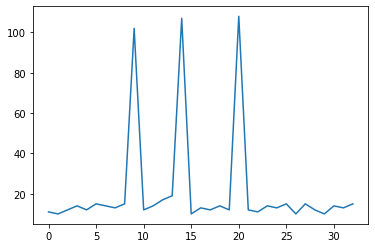

In [33]:
plt.plot(dataset)

In [34]:
# Clearly can detect three ouliers values greater than 100

# Method 1st

## Using Z score
### Formula for Z score = (Observation — Mean)/Standard Deviation

##  z = (X — μ) / σ

In [19]:
outliers = []

def detect_outliers(data):
    # set threshold to 3rd standard deviation 
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        
        # np.abs is to provide postive values
        # check for any values greater than 3rd standard deviation 
        # will be consider an outlier
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers        

In [20]:
outliers_point_z_score = detect_outliers(dataset)

In [21]:
outliers_point_z_score

[102, 107, 108]

# Method 2nd

## InterQuantile Range
#### 75%- 25% values in a dataset

#### Steps
#### 1. Arrange the data in increasing order
#### 2. Calculate first(q1) and third quartile(q3)
#### 3. Find interquartile range (q3-q1)
#### 4.Find lower bound q1*1.5
#### 5.Find upper bound q3*1.5

###  Anything that lies outside of lower and upper bound is an outlier

#######            0      25%      50%     75%    100%
#            min |------*------*------*------| max
#####                                    Q1           Q2           Q3

In [6]:
sorted(dataset)

[10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [7]:
quantile1 , quantile3 = np.percentile(dataset , [25,75])

In [8]:
quantile1 , quantile3

(12.0, 15.0)

In [9]:
# finding IQR

iqr_val = quantile3 - quantile1
iqr_val

3.0

In [14]:
# Finding the lower and upper bound

lower_bound_val = quantile1 - (1.5 * iqr_val)

upper_bound_val = quantile3 + (1.5 * iqr_val)

In [15]:
print(lower_bound_val , upper_bound_val)

7.5 19.5


In [22]:
outliers_point_iqr = []
for i in dataset:
    if i < lower_bound_val or i > upper_bound_val:
        outliers_point_iqr.append(i)
        

In [24]:
outliers_point_iqr

[102, 107, 108]

In [25]:
# Using Z_Score
outliers_point_z_score

[102, 107, 108]

In [26]:
# Using IQR
outliers_point_iqr

[102, 107, 108]